In [2]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Leitura de dados
dados = pd.read_csv('Dados/dados25.txt', sep="\t", header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []

for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

In [ ]:
# Definição da função a ser plotada
def func(x, i0, eta, xi):
    return i0*(1.0 - eta*np.sin(2*x) + xi*np.cos(2*x))

In [4]:
# Cálculo dos parâmetros pelo curve_fit (minimos quadrados de função não linear)
popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)

i0_p, eta_p, xi_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Deta, Dxi = perr

print("I_0:", i0_p,"+-", Di0)
print("eta:", eta_p,"+-", Deta)
print("xi:", xi_p,"+-", Dxi)

I_0: 0.11299983454293422 +- 0.0013259866616055957
eta: -0.8000237420261822 +- 0.019339377666241008
xi: -0.4891021969156202 +- 0.016990917545067912


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_3502/4170219988.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.', color = 'red')


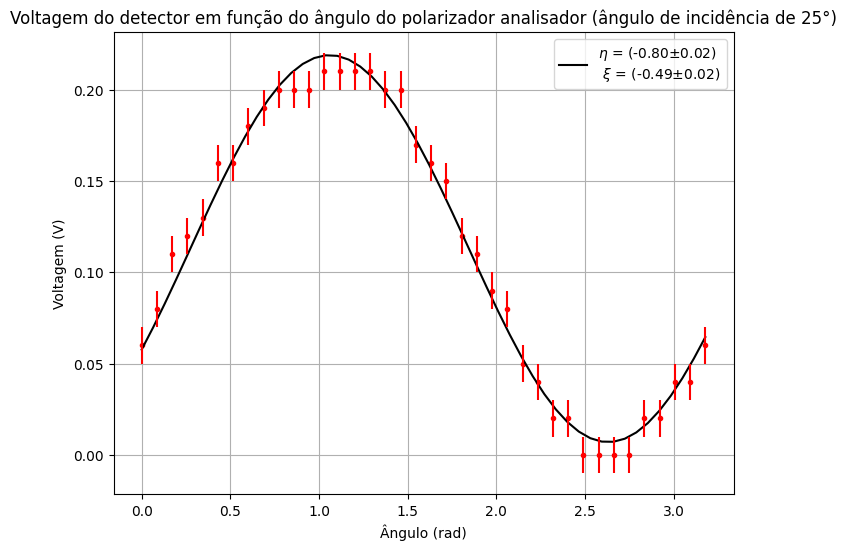

In [5]:

def dataPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.', color = 'red')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, eta_p, xi_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= str("$\eta$ = (%1.2f$\pm$%1.2f)\n " % (eta_p, Deta) + "$\\xi$ = (%1.2f$\pm$%1.2f)" % (xi_p, Dxi)), color = 'black')
    grafico.errorbar(xData, yData, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência de 25°)') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Acr25graus.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot(graphWidth, graphHeight)

/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_3502/3873213279.py:37: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


38
Chi quadrado = 23.32


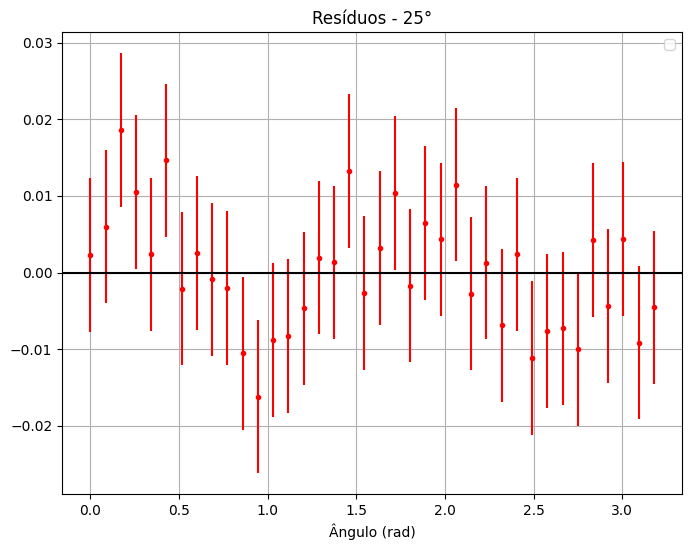

In [6]:
# Resíduos:

yAjuste = []
for i in xData:
    np.append(yAjuste,func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i in yAjuste:
    np.append(residuosAbsolutos, yData[i] - yAjuste[i])


# Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

print(len(xData))

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 25°') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos25.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)